# Вычислительная математика

## Теория приближений

### Полиномиальная интерполяция

## Теория приближений

* Основная задача: для функции $f$ из заданного класса $F$ найти наилучшее *в некотором смысле* приближение $\phi \approx f$ из класса $\Phi$ "простых" и "удобных" функций.

* Задача включает в себя 
    * построение эффективного алгоритма вычисления приближения
    * доказательство различных оценок сложности алгоритма и величины ошибки приближения в зависимости от свойств класса $F$ (гладкость, величина производных, периодичность и т.п.)

## Важная идея

* **Большое число численных алгоритмов основаны на простой идее: приблизим исследуемую функцию "простой" функцией, а для простой функции решим задачу точно.**  
Примеры:
    * Численное дифференцирование
    * Численное интегрирование
    * Методы оптимизации
    * Численное решение дифференциальных уравнений
    * ...

## Теория приближений. Общие подходы

Как правило, классами $F$ и $\Phi$ являются некоторые линейные пространства функций с областью определения $\Omega$.

Можно выделить два общих подхода к решению указанной задачи:

1. *Минимизационный подход:* Выбирается какая-либо норма $\Vert \cdot \Vert$ на $F$ и ищется функция $\phi \in \Phi \subset F$, минимизирующая $\Vert f - \phi\Vert$
2. *Интерполяционный подход:* Выбираются точки (узлы) $x_0, \ldots, x_n \in \Omega$ и ищется функция $\phi \in \Phi$, удовлетворяющая *интерполяционным условиям:*
$$
\phi(x_i) = f(x_i), \; i = 0, 1, \ldots, n
$$

На самом деле, часто узлы не выбираются, а приходят "сверху": например, это могут быть моменты времени, в которые экспериментально измерялась некоторая величина.

## Интерполяция обобщенным многочленом 

* Рассмотрим систему линейно-независимых функций $\phi_0,\ldots, \phi_n$, образующих базис в линейном подпространстве $\Phi_n \subset \Phi$. Будем искать приближение в виде обобщенного полинома
$$
\phi = \sum_{k=0}^{n} c_k \phi_k
$$

* Интерполяционные условия в узлах $x_0, \ldots, x_n$ образуют линейную систему:

$$
\left[
\begin{array}{cccc}
\phi_0(x_0) & \phi_1(x_0) & \ldots & \phi_n(x_0) \\
\phi_0(x_1) & \phi_1(x_1) & \ldots & \phi_n(x_1) \\
\ldots & \ldots & \ddots & \ldots \\
\phi_0(x_n) & \phi_1(x_n) & \ldots & \phi_n(x_n) 
\end{array}
\right]
\left[
\begin{array}{c}
c_0 \\
c_1 \\
\ldots \\
c_n
\end{array}
\right] = 
\left[ 
\begin{array}{c}
f(x_0) \\
f(x_1) \\
\ldots \\
f(x_n)
\end{array}
\right]
$$

* Если матрица этой системы невырожденная, то обобщенный итерполяционный многочлен существует и единственен.

## Интерполяция алгебраическими многочленами

* Рассмотрим теперь случай, когда $\Phi$ - пространство многочленов, а $\Phi_n$ - пространство многочленов степени не выше $n$. В качестве базиса в $\Phi_n$ возьмем систему степеней $1, x^1, x^2, \ldots, x^n$. Выписанная выше матрица линейной системы:

$$
A = \left[
\begin{array}{cccc}
1 & x_0 & x_0^2 &\ldots & x_0^n \\
1 & x_1 & x_1^2 & \ldots & x_1^n \\
\ldots & \ldots & \ddots & \ldots \\
1 & x_n & x_n^2 & \ldots & x_n^n 
\end{array}
\right]
$$

Это матрица Вандермонда. Можно доказать, что
$$
det(A) = \prod_{0 \le i < j \le n} (x_j - x_i)
$$

* Т.е., если все узлы различны, то матрица невырожденная, следовательно, **интерполяционный многочлен существует и единственен**.


In [1]:
# Плохая обусловленность матрицы Вандермонда
import numpy as np
n = 35
x = np.linspace(0,1,n)
A = np.vander(x)
c = np.ones((n))
b = np.dot(A, c)
c_ = np.linalg.solve(A, b)
print(np.linalg.norm(c-c_, ord = np.inf))

76937538.53770486


## Интерполяционный многочлен в форме Лагранжа

* **Не нужно искать коэффициенты многочлена. Достаточно получить способ вычисления значения многочлена в любой точке.** 

* Интерполяционный многочлен легко сконструировать: возьмем многочлены степени $n$ $l_0(x), \ldots, l_n(x)$, удовлетворяющие следующим условиям:
$$
l_j(x_i) = \left\{
\begin{array} {l}
1, \, i=j \\
0, \, i \ne j
\end{array}
\right. 
$$
Тогда 
$$
L_n(x) = \sum_{j=0}^n f(x_j) l_j(x)
$$

* Многочлены $l_j$ существуют и единственны - это мы уже доказали. Их называют *элементарными многочленами Лагранжа*, а форму записи выше называют *интерполяционным многочленом в форме Лагранжа*. 

Эти многочлены удобны тем, что легко получить общую формулу для них:
$$
l_j(x) = \prod_{k = 0, \, k \ne j}^n \frac{x - x_k}{x_j - x_k}
$$

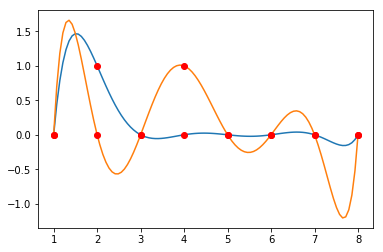

In [6]:
# Многочлены Лагранжа
%matplotlib inline
from scipy.interpolate import BarycentricInterpolator
import numpy as np
from matplotlib import pyplot as plt

n = 8
for j in [2,4]:
    xi = np.arange(n) + 1
    yi = np.zeros(n)
    yi[j-1] = 1
    lagrange = BarycentricInterpolator(xi,yi)

    x = np.linspace(1,n,100)
    y = lagrange.__call__(x)

    plt.plot(x,y)
    plt.plot(xi, yi,'ro')

## Погрешность интерполяции

**Теорема:**  
Пусть $x_0, \ldots, x_n \in [a,b]$ и $f \in C^{n+1}[a,b]$. Тогда 
$$
\begin{align}
f(x) - L_n(x) = \frac{f^{(n+1)} \left(\xi(x)\right) }{(n+1)!} \omega(x), \quad \omega(x) = \prod_{k=0}^n (x-x_k)
\end{align}
$$
где 
$$
\xi(x) \in \big[\min\{x, x_0, \ldots, x_n\}, \max\{x, x_0, \ldots, x_n\}\big]  
$$


**Доказательство**  
* Если $x \ne x_k$, то $\omega(x) \ne 0$ и можно рассмотреть функцию от $t$:
$$
g(t) \equiv f(t) - L_n(t) -c \omega(t), \quad c \equiv \frac{f(x) - L_n{x}}{\omega(x)}
$$

* Функция $g(t)$ обращается в нуль при $t = x, x_0, \ldots, x_n$. По теореме Ролля $g^{(1)}(t)$ имеет $n+1$ нуль $\Rightarrow \ldots$ $g^{n+1}(t)$ имеет хотя бы один ноль: $\exists \xi : g^{(n+1)}(\xi) = 0$:
$$
g^{(n+1)}(t) = f^{(n+1)}(t) - c(n+1)! \Rightarrow f^{(n+1)}(\xi(x)) - \frac{f(x) - L_n(x)}{\omega(x)}(n+1)! = 0
$$

## Разделенные разности

Значения $f(x_k)$ в узлах будем называть *разделенными разностями порядка 0*. Для любой пары узлов $x_l,x_m$ величины 
$$
f(x_l; x_m) = \frac{f(x_l) - f(x_m)}{x_l - x_m}
$$

будем называть *разделенными разностями порядка 1*. Далее по индукции
$$
f(x_0;\ldots;x_k) = \frac{f(x_1;\ldots;x_k) - f(x_0;\ldots;x_{k-1})}{x_k - x_0}
$$
будем называть *разделенными разностями порядка k*

## Разделенные разности
Верна следующая формула:
$$
\displaystyle f(x_0;\ldots;x_k) = \sum_{j=0}^{k} \frac{f(x_j)}{\displaystyle \prod_{\substack{l=0 \\ l \ne j}}^k (x_j - x_l)}
$$

**Доказательство:** По индукции: 
$$
\begin{align}
f(x_0; \ldots; x_k) & =  \frac{f(x_1;\ldots;x_k) - f(x_0;\ldots;x_{k-1})}{x_k - x_0} = \sum_{j=1}^k \frac{f(x_j)}{\displaystyle\prod_{l = 1, l \ne j}^k (x_j - x_l)(x_k - x_0)} - \sum_{j=0}^{k-1} \frac{f(x_j)}{\displaystyle\prod_{l = 0, l \ne j}^{k-1} (x_j - x_l)(x_k - x_0)} = \\
& = \frac{f(x_0)}{\prod_{l = 0, l \ne 0}^k (x_0 - x_l)} + \frac{f(x_k)}{\prod_{l = 0, l \ne k}^k (x_k - x_l)} + \sum_{j=1}^{k-1} \frac{f(x_j)}{\displaystyle\prod_{l = 1, l \ne j}^{k-1} (x_j - x_l)(x_k - x_0)}\left\{\frac{1}{x_j - x_k} - \frac{1}{x_j - x_0}\right\} = \\
& =\frac{f(x_0)}{\prod_{l = 0, l \ne 0}^k (x_0 - x_l)} + \frac{f(x_k)}{\prod_{l = 0, l \ne k}^k (x_k - x_l)} + \sum_{j=1}^{n-1}\frac{f(x_j)}{\displaystyle\prod_{l = 0, l \ne j}^{k} (x_j - x_l)}
\end{align} 
$$

## Следствия
$$
f(x_0;\ldots;x_k) = \sum_{j=0}^{k} \frac{f(x_j)}{\displaystyle \prod_{\substack{l=0 \\ l \ne j}}^k (x_j - x_l)}
$$

1) Значения разделенной разности не зависит от порядка узлов

2) Верно:
$$f(x) - L_n(x) = f(x; x_0;\ldots;x_n) \omega(x)$$
Доказательство:
$$f(x) - L_n(x) = \omega(x) \left(\frac{f(x)}{\omega(x)} + \sum_{j=0}^n \frac{f(x_j)}{(x_j - x) \omega'(x_j)}\right)$$

3) Сравнивая 2 формы ошибки интерполяции получаем:
$$
f(x_0;\ldots;x_k) = \frac{f^{(k)}(\xi)}{k!} \\
\xi(x) \in \big[\min\{x, x_0, \ldots, x_n\}, \max\{x, x_0, \ldots, x_n\}\big]  
$$

## Интерполяционный многочлен в форме Ньютона

**Теорема**  
$$
\begin{align}
L_n(x) = f(x_0) & + f(x_0; x_1) (x - x_0) \\
 & + f(x_0;x_1;x_2)(x-x_0)(x-x_1) \\
 & +   \ldots \\
 & + f(x_0;x_1;\ldots;x_n) (x-x_0) \ldots (x - x_{n-1})
%\label{eq:newton}
\end{align}
$$


* $L_n = L_0 + (L_1 - L_0) + (L_2 - L_1) + \ldots + (L_{n} - L_{n-1})$, где $L_k$ интерполяционный полином по первым $k+1$ точкам.

* $L_{k-1}$ интерполирует $L_k$ в узлах $x_0, \ldots, x_{k-1}$, следовательно
$$
L_k(x) - L_{k-1}(x) = L_k(x; x_0;\ldots;x_{k-1})(x-x_0) \ldots (x - x_{k-1})
$$

* $L_k(x; x_0;\ldots;x_{k-1}) = L_k^{(k)}(\xi) /k! = a_k$,  $L_k = a_k x^k + \ldots$, не зависит от $x$.  
Поэтому можно взять $x = x_k$, а  $L_k(x_k; x_0;\ldots;x_{k-1}) = f(x_0; \ldots; x_k)$

## Таблица разделенных разностей

$$
\begin{array}{lllllll}
f(x_0) & & & & & & \\
 &\ddots & & & & & \\
f(x_1) &\ldots & f(x_0;x_1) & & & & \\
 & \ddots & & \ddots & & & \\
f(x_2) & \ldots & f(x_1;x_2) & \ldots & f(x_0;x_1;x_2) & & \\
 & \ddots & & \ddots & & \ddots & \\
f(x_3) & \ldots & f(x_2;x_3) & \ldots & f(x_1;x_2;x_3) & \ldots & f(x_0;x_1;x_2;x_3)
\end{array}
$$

## Эрмитова интерполяция
* Форму Ньютона легко обобщить на случай *кратных узлов* $x_k = x_{k+1}$. В этом случае разделенная разность превращается в производную функции в точке $f(x_1; x_2 = x_1) = f^{(1)}(x_1)$
* При эрмитовой интерполяции можно достигнуть той же точности при меньшем числе точек, НО нужно знать производные функции.

## Сходимость интерполяционного процесса

Основные вопросы:
1. Будет ли последовательность многочленов $L_n$ сходится к $f(x)$: $L_n(x) \to f(x), \; \forall x \in [a,b]$
2. Будете ли сходимость равномерной: $\displaystyle \sup_{x \in [a,b]} |f(x) - L_n(x)| \to 0$
3. Как сходимость зависит от свойств функции (гладкость) и узлов интерполяции?

Для $f \in C^\infty[a,b]$ со свойством $\sup \vert f(x) \vert \le M^n \; \forall n$ из формулы для погрешности следует:
$$
f(x) - L_n(x) = \frac{f^{(n+1)} \left(\xi(x)\right) }{(n+1)!}\prod_{k=0}^n (x-x_k) \le \frac{(M(b-a))^{(n+1)}}{(n+1)!} \approx \frac{(M(b-a))^{(n+1)}}{\sqrt{2\pi (n+1)} ((n+1)/e)^{(n+1)}} \to 0
$$

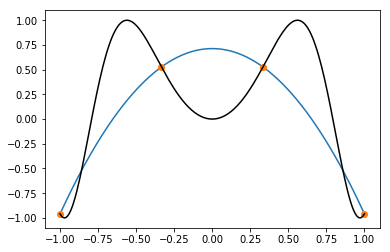

In [35]:
%matplotlib inline
from scipy.interpolate import BarycentricInterpolator
import numpy as np
from matplotlib import pyplot as plt
f = lambda x : np.sin(5 * x**2) 
# f = lambda x: 1/(25*x**2 + 1)
x = np.linspace(-1,1,200)
for n in [4]:
    xi = np.linspace(-1,1,n)
    yi = f(xi)
    Ln = BarycentricInterpolator(xi,yi)
    y = Ln.__call__(x)
    plt.plot(x,y)
    plt.plot(xi, yi,'o')
plt.plot(x,f(x),'k-')

In [43]:
from sympy import *
z = Symbol('z')
diff(1/(25*z**2 + 1), z,4)

15000*(10000*z**4/(25*z**2 + 1)**2 - 300*z**2/(25*z**2 + 1) + 1)/(25*z**2 + 1)**3

## Сходимость операторов

* $F = C[a,b]$ - банахово пространство с нормой 
$$
\Vert f \Vert_{C[a,b]} \equiv \max_{x \in [a,b]} \vert f(x) \vert
$$

* $\Pi_n$ - пространство полиномов степени $\le n$.  
Интерполяционному процессу можно сопоставить оператор, отображает функцию в интерполяционный многочлен:
$$
P_n : F \to \Pi_n, \quad P_n f = L_n
$$

* Этот оператор 
    * линейный: $P_n (f_1 + f_2) = P_n f_1 + P_n f_2$ 
    * непрерывный (ограниченный)
    * является проектором: $P_n^2 = P_n$
    
 При каких условиях $P_n f \to f \quad \forall f \in F$?

## Принцип равномерной ограниченности

**Теорема**  
Для любой последовательности непрерывных линейных операторов $\{P_n\}$ верно
$$
\sup_{n} \Vert P_n f\Vert \le c(f) < +\infty \; \forall f \in F \quad \Leftrightarrow \quad \sup_n \Vert P_n \Vert < +\infty 
$$



**Теорема Банаха-Штейнгауза**  
*Для того, чтобы последовательность функций $P_n f$ сходилась для всех $f\in F$, необходимо и достаточно:*
1. $\sup_n \Vert P_n \Vert \le M < + \infty$
2. $P_n f$ *сходится при $n \to \infty$ на подмножестве $\tilde{F}$, всюду плотном в $F$ (т.е. любой элемент $F$ можно с любой точностью приблизить элементом $\tilde{F}$)*

* ($\Rightarrow$) - из принципа равномерной ограниченности
* ($\Leftarrow$) возьмем $f \in F$ и $\varepsilon$-приближение $f_{\varepsilon} \in \tilde{F}$: $\Vert f - f_{\varepsilon} \Vert \le \varepsilon$:
$$
\Vert P_n f - P_m f \Vert \le \Vert P_n f - P_n f_{\varepsilon} \Vert + \Vert P_n f_{\varepsilon} - P_m f_{\varepsilon} \Vert + \Vert P_m f_{\varepsilon} - P_m f \Vert \le M \varepsilon + \varepsilon + M \varepsilon
$$
следовательно последовательность фундаментальная и сходится.

## Принцип равномерной ограниченности, интерполяция

* Если $P_n$ - оператор интерполяции, то $P_n f \to f$ для всех многочленов $f$. 
* По теореме Вейерштрасса, любую непрерывную функцию можно приблизить многочленом, т.е. это всюду плотное множество 
* **Сходимость будет определяться поведением норм $\Vert P_n \Vert$ при $n \to \infty$**

## Связь с тригонометрическими полиномами

1. Замена $x = \frac{a + b}{2} + \frac{b - a}{2} t $ переводит $[a,b]$ в $[-1,1]$
2. Замена $t = \cos \phi,\; \phi \in [-\pi,\pi]$ позволяет перейти к четным $2\pi$-периодическим функциям от $\phi$.
3. Алгебраический полином $p_n(t)$ степени $\le n$ превращается в четный тригонометрический полином, т.к. степени косинуса выражаются через косинусы кратного аргумента
$$
\begin{align}
& \cos^2 \phi = \frac{1 + \cos 2 \phi}{2}\\
& \cos^3 \phi = \frac{3 \cos \phi + \cos 3 \phi}{4}\\
& \ldots
\end{align}
$$
следовательно:
$$
p_n(\cos \phi) = q_n(\phi) = \sum_{k=0}^{n} \alpha_k \cos k \phi
$$


**Приближение функций алгебраическими многочленами сводится к приближению тригонометрическими многочленами.**

## Связь с тригонометрическими полиномами

1. Произвольный тригонометрический полином можно представить в виде:
$$
Q_n(\phi) = \sum_{k = - n}^{n} c_k e^{i k \phi}
$$
где $c_{-k} = \overline{c}_k$ (чтобы значения были вещественны)
2. Рассмотрим оператор-проектор $S_n$ переводящий $f \in C[-\pi,\pi]$ в $n$-ю частичную сумму *ряда Фурье*:
$$
f(\phi) \to s_n(\phi) = \sum_{k=-n}^{n} c_k e^{ik\phi}, \; c_k = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(\psi) e^{-ik\psi} d\psi = \frac{(f, e^{ik\phi})}{\Vert e^{ik\phi} \Vert^2 }
$$
3. **Теорема:** $\Vert S_n \Vert \ge c \ln(n), \; c>0$
4. **Следствие:** Существует непрерывная периодическая функция, для которой ряд Фурье не сходится *равномерно* ни к какой непрерывной функции. 



## Связь с тригонометрическими полиномами

**Следствие:** можно показать, что для операторов, связанных с интерполяцией: $\Vert P_n \Vert \ge \Vert S_n \Vert c \log(n)$, тогда   
*для любой последовательности сеток существует непрерывная функция, для которой последовательность интерполяционных многочленов не сходится равномерно ни к какой непрерывной функции.*
* Для равномерных сеток нормы $\Vert P_n\Vert$ растут экспоненциально. Пусть $t_j = -1 + \frac{2}{n}j, \; j = 0, \ldots,n$. Для $t = -1 +\frac{2}{n}\theta, \; 0<\theta<1$:
$$
\Vert P_n \Vert = \max_{t \in [-1,1]} \sum_{k=0}^{n} \bigg\vert \prod_{j=0,j\ne k}^n \frac{t - t_j}{t_k -t_j}\bigg\vert \ge \sum_{k=0}^n \bigg\vert \prod_{j=0,j\ne k}^n \frac{\theta - j}{k -j}\bigg\vert \ge \frac{\theta(1 - \theta)}{n^2} \sum_{k=0}^{n} \frac{n!}{k! (n-k)!} = \frac{\theta(1 - \theta)}{n^2} 2^n
$$
* Как подобрать точки интерполяции, чтобы $\Vert P_n \Vert$ расли не так быстро? Или чтобы модуль $\omega(x) = \prod_k (x-x_k)$ в оценке остаточного члена был меньше?

## Многочлены Чебышева, чебышёвские сетки

1. Многочлены Чебышева $T_n(t) = \cos (n \arccos t), \; t \in [-1,1]$
2. $T_0(t) = 1$, $T_1(t) = t$, при $n \ge 1$
$$
\cos((n+1) \arccos t) + \cos((n-1) \arccos t) = 2 \cos (n \arccos t) \cos (\arccos t) \Rightarrow
$$
$$
T_{n+1}(t) = 2 t T_n(t) - T_{n-1}, n = 1,2, \ldots
$$
3. $T_n(t)$ - многочлен степени $n$ со старшим коэффициентом $2^{n-1}$
4. Корни многочлена 
$$
t_{nj} = \cos \left( \frac{\pi}{2n} + \frac{\pi}{n} j\right), \; j = 0, \ldots, n-1
$$
Они получаются отображением $t = \cos \phi$ из равномерной сетки на $[0,\pi]$ отображением $t = \cos \phi$

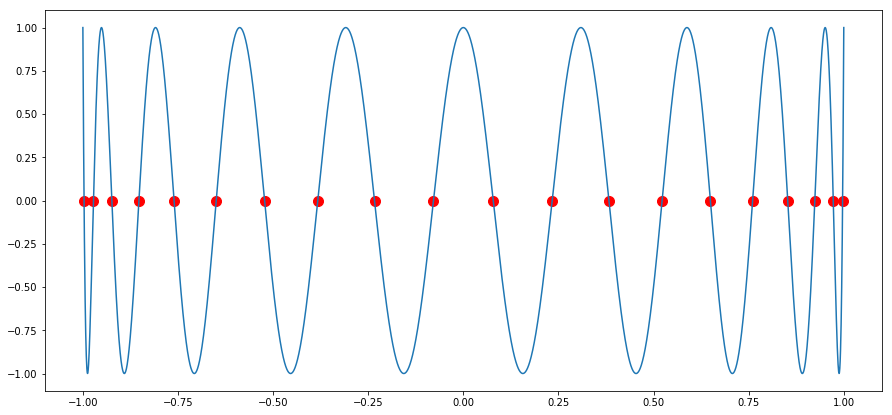

In [11]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
n = 20
j = np.arange(n)
tn = np.cos(np.pi/(2*n) + np.pi * j / n)
xx = np.linspace(-1,1,4000)
fig, ax = plt.subplots(figsize = (15,7))
plt.plot(tn, np.zeros(n), 'ro', ms = 10)
plt.plot(xx, np.cos(n * np.arccos(xx)))

## Многочлены Чебышева, чебышёвские сетки

Для чебышёвских узлов: 
1. $$
\omega_n(t) = \prod_{j=0}^{n-1} (t - t_{nj}) = \frac{1}{2^{n-1}} \cos (n \arccos t)
$$
2. 
$$
\Vert P_n \Vert = \mathcal{O(\ln \, n)}
$$
3. **Теорема:** Если $f \in C^{m}[-1,1], \; m \ge 1$ и $P_n$ - интерполяционный проектор по чебышевским узлам, то 
$$
\Vert f - P_n f \Vert_{C[-1,1]} = \mathcal{O}\left(\frac{\ln \, n}{n^m}\right)
$$
4. **Теорема (аналитические функции):** Пусть $f(z)$ - аналитическая функция в замыкании комплексной области $\Omega_\rho$ (*эллипс Бернштейна*), тогда для интерполяционного многочлена по чебышевским узлам для некоторого $c >0$
$$
\vert f(x) - L_n(x)\vert \le \frac{c}{\rho^n} \; \forall n, x \in [-1,1]
$$
**Замечание:** То же будет верно для любой сетки с плотностью узлов $\frac{1}{\sqrt{1 - t^2}}$

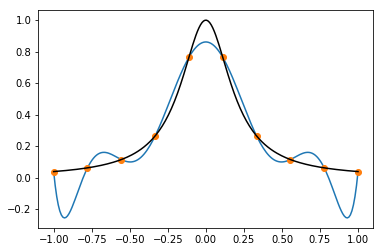

In [23]:
%matplotlib inline
from scipy.interpolate import BarycentricInterpolator
import numpy as np
from matplotlib import pyplot as plt
# f = lambda x : np.sin(5 * x**2) 
f = lambda x: 1/(25*x**2 + 1)
x = np.linspace(-1,1,200)
for n in [10]:
    j = np.arange(n)
#     xi = np.cos(np.pi/(2*n) + np.pi * j / n)
    xi = np.linspace(-1,1,n)
    yi = f(xi)
    Ln = BarycentricInterpolator(xi,yi)
    y = Ln.__call__(x)
    plt.plot(x,y)
    plt.plot(xi, yi,'o')
plt.plot(x,f(x),'k-')